In [27]:
import os
# Set environment variable to suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from src.loading_data.get_data import get_tf_data, stack_1d_features, normalize_1d_features_with_mean_std, load_cv_data, make_importance_sampling_dataset
from src.cnn_emos.nn_forecast import CNNEMOS, CNNBaggingEMOS
from src.visualization.twcrpss_plot import make_twcrpss_plot_tf
from src.visualization.brier_score import make_brier_skill_plot_tf
from src.visualization.pit import make_cpit_diagram_tf, comp_multiple_pit_scores
from src.visualization.reliability_diagram import make_reliability_and_sharpness_tf
from src.visualization.plot_forecasts import plot_forecast_pdf_tf, plot_weight_mixture_cnns
from src.climatology.climatology import Climatology
from src.linreg_emos.emos import LinearEMOS
from src.loading_data.get_data import get_fold_is
from src.visualization.brier_score import make_bootstrap_brier, make_bootstrap_brier_efficient


import sklearn

from scipy.stats import norm

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import optuna

In [2]:
all_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

location_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

scale_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

features_names_dict = {name: 1 for name in all_features}

features_names_dict['wind_speed'] = 15

ignore = ['229', '285', '323']

In [3]:
folder = '/net/pc200239/nobackup/users/hakvoort/models/climatology/climatology_cv_0'

climatology = Climatology.load(folder)

In [4]:
train_data0_original, test_data0_original, ignore = load_cv_data(0, features_names_dict)

data_load = train_data0_original.batch(32)

train_data0 = train_data0_original.batch(train_data0_original.cardinality())
test_data0 = test_data0_original.batch(test_data0_original.cardinality())

In [5]:
train_data1, test_data1_original, ignore = load_cv_data(1, features_names_dict)

train_data1 = train_data1.batch(train_data1.cardinality())
test_data1 = test_data1_original.batch(test_data1_original.cardinality())

In [6]:
train_data2, test_data2_original, ignore = load_cv_data(2, features_names_dict)

train_data2 = train_data2.batch(train_data2.cardinality())
test_data2 = test_data2_original.batch(test_data2_original.cardinality())

In [7]:
train_data3, test_data3_original, ignore = load_cv_data(3, features_names_dict)

train_data3 = train_data3.batch(train_data3.cardinality())
test_data3 = test_data3_original.batch(test_data3_original.cardinality())

In [8]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/emos_base'

with open(filepath, 'rb') as f:
    emos_base = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/extreme'

with open(filepath, 'rb') as f:
    extreme = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/intermediate'

with open(filepath, 'rb') as f:
    intermdiate = LinearEMOS(pickle.load(f))

Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution


In [9]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/emos_base1'

with open(filepath, 'rb') as f:
    emos_base1 = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/extreme1'

with open(filepath, 'rb') as f:
    extreme1 = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/intermediate1'

with open(filepath, 'rb') as f:
    intermdiate1 = LinearEMOS(pickle.load(f))

Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution


In [10]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/emos_base2'

with open(filepath, 'rb') as f:
    emos_base2 = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/extreme2'

with open(filepath, 'rb') as f:
    extreme2 = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/intermediate2'

with open(filepath, 'rb') as f:
    intermdiate2 = LinearEMOS(pickle.load(f))

Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution


In [11]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/emos_base3'

with open(filepath, 'rb') as f:
    emos_base3 = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/extreme3'

with open(filepath, 'rb') as f:
    extreme3 = LinearEMOS(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/linregemos/intermediate3'

with open(filepath, 'rb') as f:
    intermdiate3 = LinearEMOS(pickle.load(f))

Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Log Normal distribution
Using given weight parameters for weights in Mixture Linear distribution


In [12]:
linear_weight_models = {'Extreme': extreme, 'Intermediate': intermdiate}

all_linear_models = {'Extreme': extreme, 'Intermediate': intermdiate, 'Vanilla': emos_base}

In [13]:
linear_weight_models1 = {'Extreme': extreme1, 'Intermediate': intermdiate1}

all_linear_models1 = {'Extreme': extreme1, 'Intermediate': intermdiate1,'Vanilla': emos_base1, }

In [14]:
linear_weight_models2 = {'Extreme': extreme2, 'Intermediate': intermdiate2}

all_linear_models2 = {'Extreme': extreme2, 'Intermediate': intermdiate2, 'Vanilla': emos_base2, }

In [15]:
linear_weight_models3 = {'Extreme': extreme3, 'Intermediate': intermdiate3}

all_linear_models3 = {'Extreme': extreme3, 'Intermediate': intermdiate3, 'Vanilla': emos_base3, }

In [16]:
x = np.linspace(0, 20, 2000)
y_intermediate = norm.cdf(x, loc=7.050563812255859, scale=2.405172109603882) + 0.06170300021767616

y_extreme = norm.cdf(x, loc=8.830960273742676, scale=1.0684260129928589) + 0.015800999477505684

y_cnn = norm.cdf(x, loc=5.42, scale=7.822) + 0.919453

x_base = np.ones(x.shape)

In [17]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/'

with open(filepath + 'epochs_115_twcrps_m9_std1_c_015.pickle', 'rb') as f:
    epochs_extreme = np.array(pickle.load(f))

filepath = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/'

with open(filepath + 'epochs_115_crps.pickle', 'rb') as f:
    epochs_115 = np.array(pickle.load(f))

with open(filepath + 'epochs_base', 'rb') as f:
    epochs_base = np.array(pickle.load(f))

with open(filepath + 'epochs_run_87', 'rb') as f:
    epochs_run_87 = np.array(pickle.load(f))


with open(filepath + 'epochs_run_87_tn', 'rb') as f:
    epochs_run_87_tn = np.array(pickle.load(f))

In [54]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/cnnemos/crps_tn_115'

cnn_base = CNNEMOS.my_load(filepath, data_load)

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/cnnemos/extreme_tn-ln_115'

cnn_extreme = CNNEMOS.my_load(filepath, data_load)

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/cnnemos/model_87'

model87 = CNNEMOS.my_load(filepath, data_load)

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/cnnemos/model_87_tn'

model_87_tn = CNNEMOS.my_load(filepath, data_load)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [56]:
cnn_models = {'TN CRPS': cnn_base, 'TN-LN Extreme': cnn_extreme, 'TN-LN Model 87': model87, 'TN Model 87': model_87_tn}

In [43]:
filepath = '/net/pc200239/nobackup/users/hakvoort/hyperopt/hyperopt_cnn/'

study_small = optuna.load_study(study_name='hyperoptCNN_small_space_444', storage=f'sqlite:///{filepath}/study.db')
study_small.set_metric_names(['CRPS', 'twCRPS12'])

/tmp/ipykernel_1493959/856509195.py:4: ExperimentalWarning: set_metric_names is experimental (supported from v3.2.0). The interface can change in the future.
  study_small.set_metric_names(['CRPS', 'twCRPS12'])


In [44]:
df_small = study_small.trials_dataframe()

new_columns_names = {
    'values_CRPS': 'CRPS',
    'values_twCRPS12': 'twCRPS12',
    'params_Batch Size': 'Batch Size',
    'params_Forecast Distribution': 'Forecast Distribution',
    'params_L2 Regularization': 'L2 Regularization',
    'params_Learning Rate': 'Learning Rate',
    'params_Number of Layers': 'Number of Layers',
    'params_Number of Units per Layer': 'Number of Units per Layer',
    'params_Optimizer': 'Optimizer',
    'params_cf constant': 'cf constant',
    'params_cf mean': 'cf mean',
    'params_cf std': 'cf std',
    'user_attrs_Average Epochs': 'Average Epochs'
}

df_small.rename(columns=new_columns_names, inplace=True)

In [45]:
length = 12
top_CRPS_small = df_small.sort_values('CRPS').head(length)
top_twCRPS12_small = df_small.sort_values('twCRPS12').head(length)

pareto_front_small = study_small.best_trials
best_runs_small = [trial.number for trial in pareto_front_small]

pareto_trials_small = df_small['number'].isin(best_runs_small)

my_run_small = df_small[pareto_trials_small]

my_run_small = my_run_small.sort_values('CRPS')

params2 = [
    'Average Epochs',
'cf mean',
'cf std',
'cf constant',
 'CRPS',
'twCRPS12',
]

In [20]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/bagging_cnn/bagging_crps_tn_115'

bagging_base_same_data = CNNBaggingEMOS.my_load(filepath)

bagging_base_same_data.load_models(data_load)

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/bagging_cnn/bagging_model_87'

bagging_model_87_same_data = CNNBaggingEMOS.my_load(filepath)

bagging_model_87_same_data.load_models(data_load)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [21]:
bagging_same_data_models = {'TN CRPS': bagging_base_same_data, 'TN-LN Model 87': bagging_model_87_same_data}

In [22]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/bagging_cnn/bagging_base'

bagging_base = CNNBaggingEMOS.my_load(filepath)

bagging_base.load_models(data_load)

filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/bagging_cnn/bagging_model_87_mixture'

bagging_model_87 = CNNBaggingEMOS.my_load(filepath)

bagging_model_87.load_models(data_load)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [43]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/final_models/bagging_cnn/bagging_model_87_tn'

bagging_model_87_tn = CNNBaggingEMOS.my_load(filepath)

bagging_model_87_tn.load_models(data_load)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/people/hakvoort/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 114 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [44]:
bagging_and_single_base_models = {'TN CRPS Single Model': cnn_base, 'TN CRPS Bagging': bagging_base}

In [46]:
all_bagging_models = {'TN CRPS': bagging_base, 'TN-LN Model 87': bagging_model_87, 'TN Model 87': bagging_model_87_tn}

bagging_model_87_models = {'TN-LN Model 87': bagging_model_87, 'TN Model 87': bagging_model_87_tn}

## Work of the past 2 weeks

- Writing thesis

- Trained the final models with linear regression

- Implemented bagging for CNNs

- Trained the final models with CNNs

- Results for CNNs seem to have changed

## Results Linear Models

- Vanilla: trained on the CRPS with TN distribution

- Intermediate: trained on twCRPS with mixture-linear TN-LN distribution

- Extreme: trained on the twCPRS with TN distribution

The interediate and extreme models have a slight improvement over the Vanilla model.

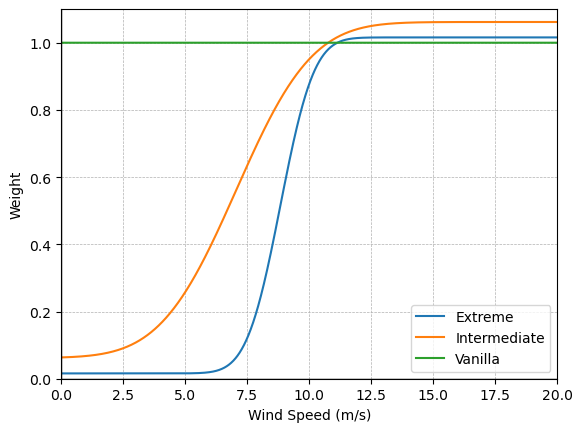

In [53]:
plt.plot(x, y_extreme, label='Extreme')
plt.plot(x, y_intermediate, label='Intermediate')
plt.plot(x, x_base, label='Vanilla')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Weight')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlim(0,20)
plt.ylim(0, 1.1)
plt.legend()
plt.show()

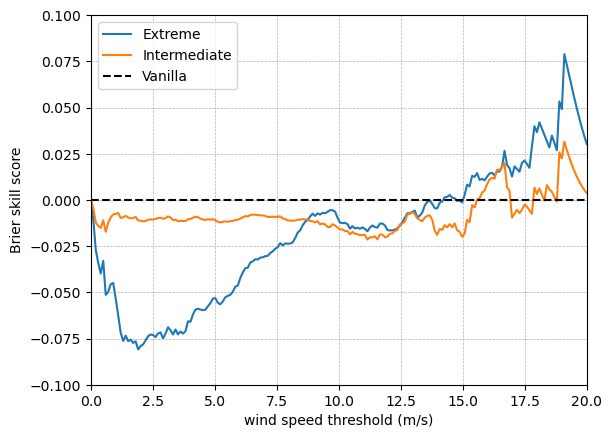

In [24]:
values = np.linspace(0,20, 200)
ylim = [-0.1, 0.1]
make_brier_skill_plot_tf(emos_base, linear_weight_models, test_data0, values, ylim=ylim, name_base_model='Vanilla')

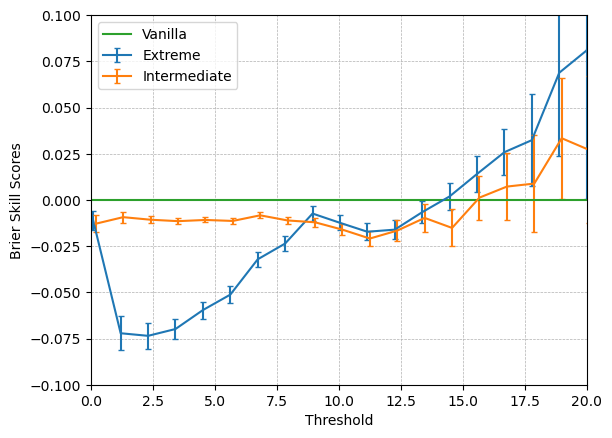

In [21]:
ylim = [-0.1,0.1]
values = np.linspace(0,20,20)
make_bootstrap_brier_efficient(emos_base, linear_weight_models, test_data0, values, ylim=ylim, bootstrap_size=1000, name_base_model='Vanilla')

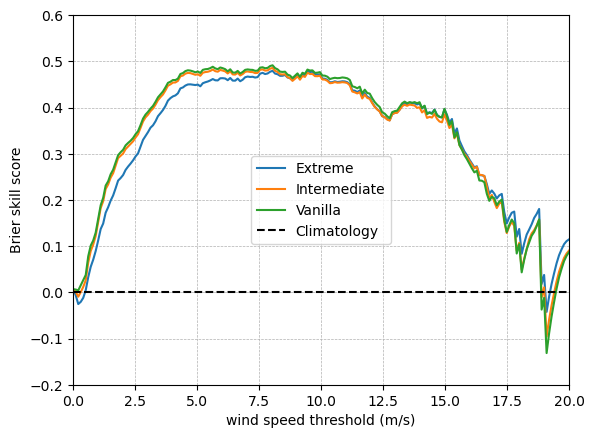

In [23]:
values = np.linspace(0.01,20, 200)
ylim = [-0.2, 0.6]
make_brier_skill_plot_tf(climatology, all_linear_models, test_data0, values, ylim=ylim, name_base_model='Climatology')

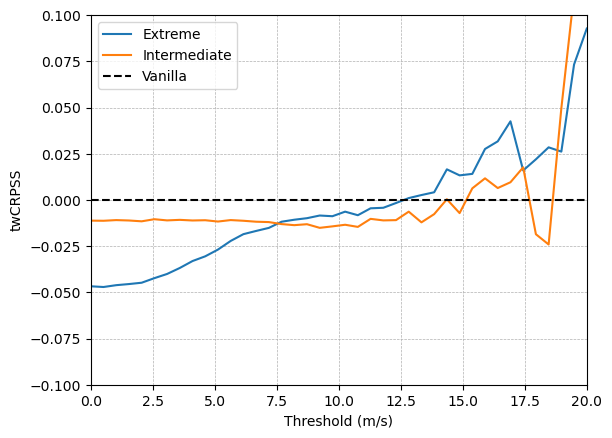

In [25]:
values = np.linspace(0,20,40)
make_twcrpss_plot_tf(emos_base, linear_weight_models, test_data0, values, ylim=[-0.1,0.1], sample_size=5000, base_model_name='Vanilla')

The calibration is pretty much identical for all three models.

There are 67 values in the PIT diagram


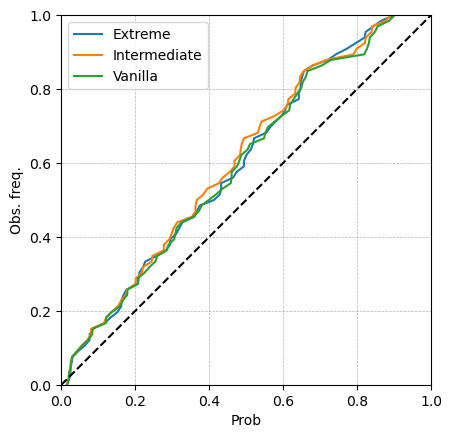

In [25]:
threshold = 15
make_cpit_diagram_tf(linear_weight_models, test_data0_original, t=threshold, base_model=emos_base, base_model_name='Vanilla')

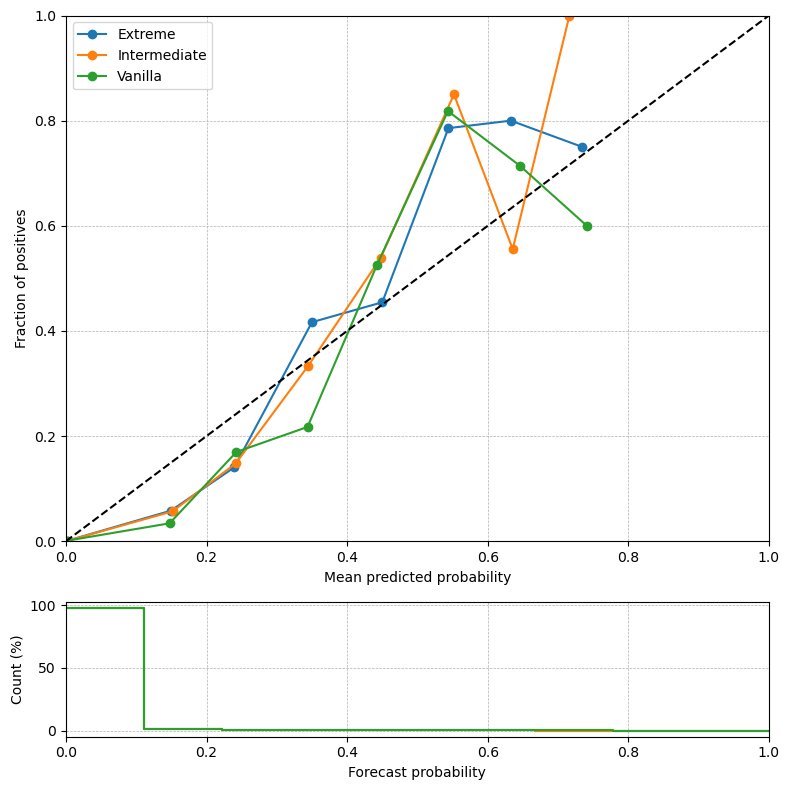

In [26]:
threshold = 15
make_reliability_and_sharpness_tf(linear_weight_models, test_data0, t=threshold, base_model=emos_base, base_model_name='Vanilla')

## Result of Cross-Validation

Over the different folds the performance of the extreme and intermediate models differes quite significantly

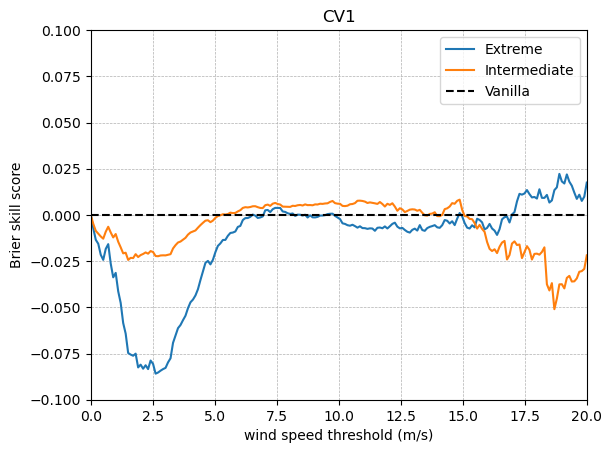

In [ ]:
values = np.linspace(0,20, 200)
ylim = [-0.1, 0.1]
make_brier_skill_plot_tf(emos_base1, linear_weight_models1, test_data1, values, ylim=ylim, name_base_model='Vanilla', title='CV1')

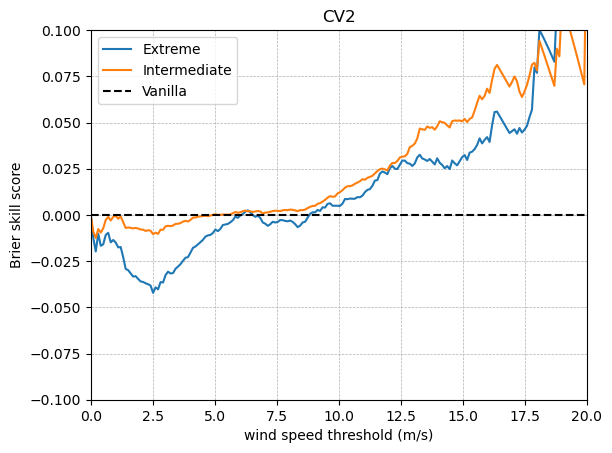

In [ ]:
values = np.linspace(0,20, 200)
ylim = [-0.1, 0.1]
make_brier_skill_plot_tf(emos_base2, linear_weight_models2, test_data2, values, ylim=ylim, name_base_model='Vanilla', title='CV2')

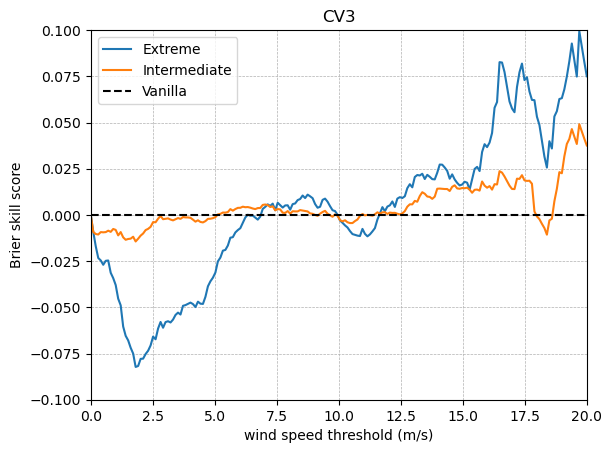

In [ ]:
values = np.linspace(0,20, 200)
ylim = [-0.1, 0.1]
make_brier_skill_plot_tf(emos_base3, linear_weight_models3, test_data3, values, ylim=ylim, name_base_model='Vanilla', title='CV3')

### Results CNNs

I resumed hyperparameter optimization and then picked model 87. I chose this model because is had the highest twCRPS12 and the most interesting weight function.

In [46]:
display(top_CRPS_small[params2])

,Average Epochs,cf mean,cf std,cf constant,CRPS,twCRPS12
58,75.500000,2.562573,5.181592,0.921521,0.822719,0.055512
49,48.333333,1.033092,4.456436,0.997382,0.823186,0.055287
57,67.000000,2.934506,5.517093,0.997124,0.823697,0.055616
33,30.000000,5.934686,9.369574,0.997574,0.823940,0.055207
40,61.333333,-0.770368,1.445118,0.837672,0.824272,0.055433
36,44.833333,2.206306,3.579858,0.875382,0.824364,0.055667
65,71.666667,1.331423,0.029540,0.924497,0.824616,0.055436
29,70.666667,-0.818025,0.001353,0.324473,0.824717,0.055406
34,56.833333,4.893108,7.301722,0.996173,0.824825,0.055409
75,80.666667,3.823494,0.546135,0.907603,0.824969,0.055409


In [47]:
display(top_twCRPS12_small[params2])

,Average Epochs,cf mean,cf std,cf constant,CRPS,twCRPS12
87,79.000000,5.419507,7.822199,0.919453,0.826580,0.054876
33,30.000000,5.934686,9.369574,0.997574,0.823940,0.055207
80,73.333333,2.034307,4.537156,0.858824,0.826256,0.055264
45,62.833333,5.493173,5.443629,0.864578,0.825594,0.055265
49,48.333333,1.033092,4.456436,0.997382,0.823186,0.055287
68,79.833333,8.097774,6.086351,0.881245,0.827166,0.055325
7,35.666667,7.637882,0.132999,0.767333,0.831321,0.055331
69,93.333333,11.254960,0.000110,0.615786,0.829631,0.055335
50,58.666667,1.043101,5.433051,0.936747,0.826826,0.055338
43,41.000000,5.860291,1.278010,0.841591,0.828269,0.055374


In [48]:
display(my_run_small[params2])

,Average Epochs,cf mean,cf std,cf constant,CRPS,twCRPS12
58,75.500000,2.562573,5.181592,0.921521,0.822719,0.055512
49,48.333333,1.033092,4.456436,0.997382,0.823186,0.055287
33,30.000000,5.934686,9.369574,0.997574,0.823940,0.055207
87,79.000000,5.419507,7.822199,0.919453,0.826580,0.054876


All models have the same architecture. This leads to the following four models:

- TN trained on the CRPS (47 epochs)

- TN-LN trained on the 'extreme' twCRPS (this was the optimal weight function from linear models) (50 epochs)

- TN-LN on weight function from model 87 (50 epochs)

- TN on weight function from model 87 (47 epochs)

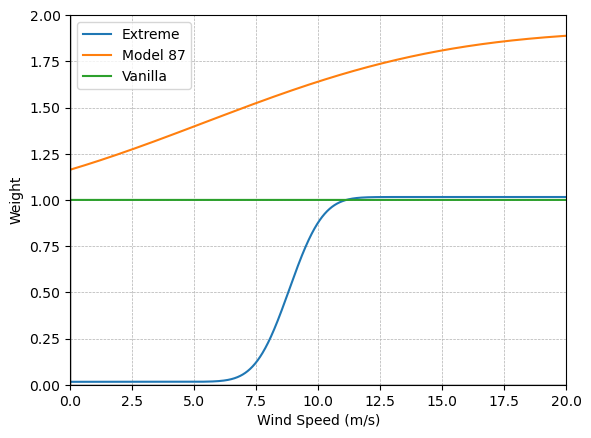

In [8]:
plt.plot(x, y_extreme, label='Extreme')
plt.plot(x, y_cnn, label='Model 87')
plt.plot(x, x_base, label='Vanilla')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Weight')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlim(0,20)
plt.ylim(0, 2)
plt.legend()
plt.show()

The number of epochs differs quite significantly. In the following table we can see the number of epochs needed to train TN CRPS model. The final row contains the averages.

In [42]:
epochs = pd.DataFrame(epochs_base)
epochs.columns = ['CV1', 'CV2', 'CV3']
epochs_mean = epochs_base.mean(axis=0)
epochs_mean_df = pd.DataFrame([epochs_mean], columns=epochs.columns)
result = pd.concat([epochs, epochs_mean_df], ignore_index=True)
display(result)

,CV1,CV2,CV3
0,69.00,69.00,76.00
1,70.00,71.00,85.00
2,81.00,70.00,75.00
3,88.00,76.00,71.00
4,53.00,83.00,64.00
5,77.00,95.00,61.00
6,59.00,104.00,62.00
7,51.00,76.00,56.00
8,69.00,59.00,52.00
9,78.00,72.00,74.00


272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


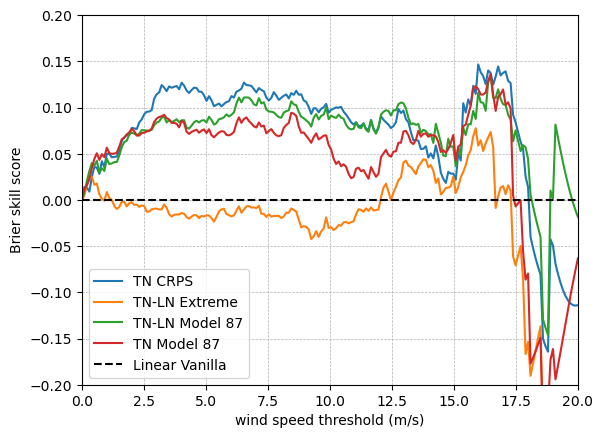

In [57]:
values = np.linspace(0, 20, 200)
ylim= [-0.2, 0.2]
make_brier_skill_plot_tf(emos_base, cnn_models, test_data0, values, ylim=ylim, name_base_model='Linear Vanilla')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
There are 67 values in the PIT diagram


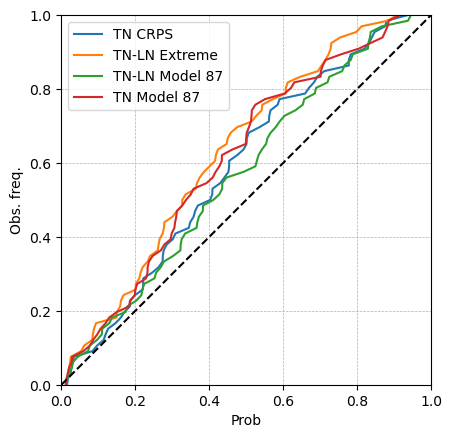

In [63]:
t = 15
make_cpit_diagram_tf(cnn_models, test_data0_original, t=t)

## In the following plot I used the bagging models

- For each model I bootstrapped the data and trained a model using this data.

- I then combined the distribution for all models, to make a single distribution. The scores are computed based on this single distribtution

- Each bagging model consists of 10 models 

Here the weight function from model 87 seems to be the best. I have not had time to make a bagging model for the TN-LN extreme model (but I think this one is the least interesting)

All the plots now contain bagging models.

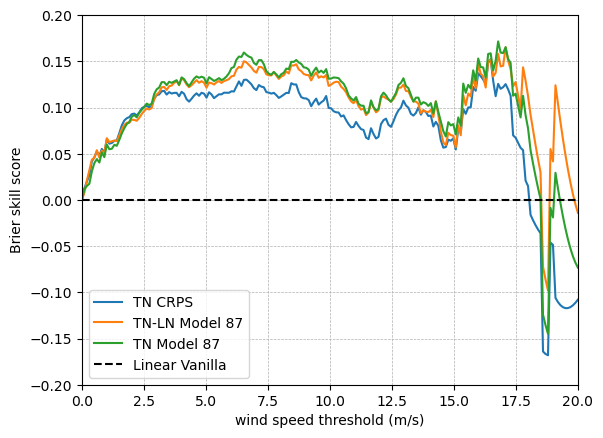

In [47]:
values = np.linspace(0,20,200)
ylim=[-0.2,0.2]
make_brier_skill_plot_tf(emos_base, all_bagging_models, test_data0, values, ylim=ylim, name_base_model='Linear Vanilla')

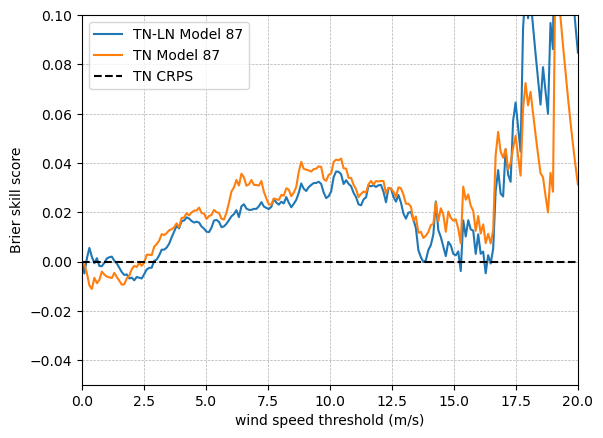

In [48]:
values = np.linspace(0,20,200)

make_brier_skill_plot_tf(bagging_base, bagging_model_87_models, test_data0, values, ylim=[-0.05, 0.1], name_base_model='TN CRPS')

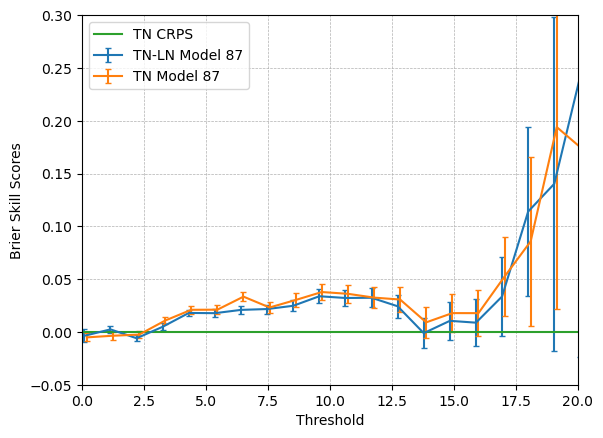

In [66]:
values = np.linspace(0,20,20)

ylim=[-0.05, 0.3]
make_bootstrap_brier_efficient(bagging_base, bagging_model_87_models, test_data0, values, ylim=ylim, name_base_model='TN CRPS')

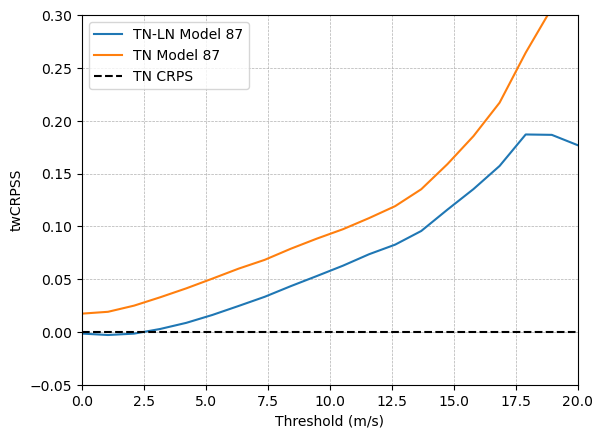

In [68]:
values = np.linspace(0,20,20)
ylim=[-0.05, 0.3]
make_twcrpss_plot_tf(bagging_base, bagging_model_87_models, test_data0, values, ylim=ylim, base_model_name='TN CRPS')

There are 8671 values in the PIT diagram


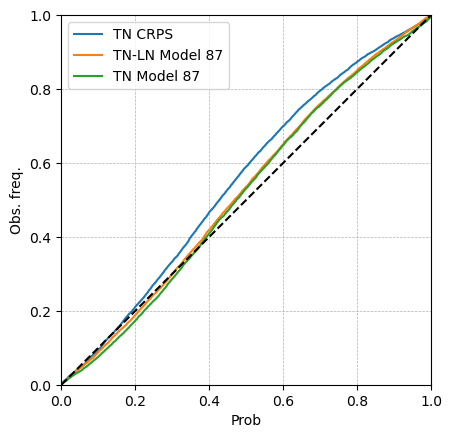

In [50]:
t = 0
make_cpit_diagram_tf(all_bagging_models, test_data0_original, t=t)

There are 67 values in the PIT diagram


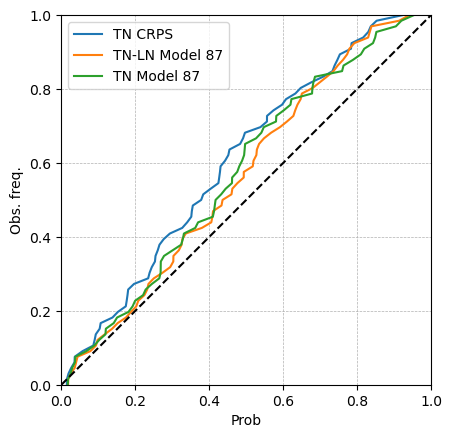

In [51]:
t = 15
make_cpit_diagram_tf(all_bagging_models, test_data0_original, t=t)

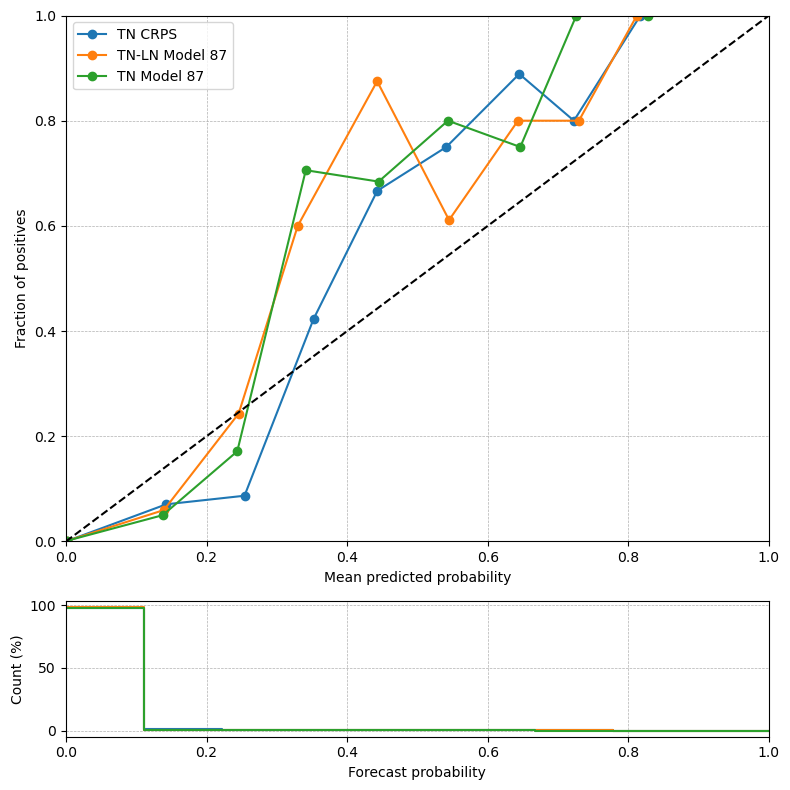

In [52]:
make_reliability_and_sharpness_tf(all_bagging_models, test_data0, t=15)

### Possible Conclusion

It seems like the weight function from model 87 can improve performance for EMOS with CNNs. Same for the linear models with the 'intermediate' and 'extreme' weight function. This shows that the optimal weight function differs between models. The effect of training on the twCRPS with the correct weight function is limited and the choice of weight function should be carefully studied. For the CNNs, more investigation of the weight function is advised, with for example linear or quadratic functions.

The choice of distribution seems to have no effect. For the linear models, having a mixture distribution with an adaptive weight parameter (based on the forecasted wind speed) seems to be best. However, in our experiments it was already showed that the model could not consistently pick the more heavy-tailed distribution for higher wind speeds and the TN for the bulk. For CNNs there is no difference in performance between the TN and TN-LN distribution. There are two reasons why this could be the case: 

- Because of my sampling based approach, the tail-behavior is hard to estimate.

- My dataset contains average wind speeds instead of maxima.

### I also trained models on the same exact same dataset instead of a bootstrapped dataset. Each 'bagging' model still consists of 10 models


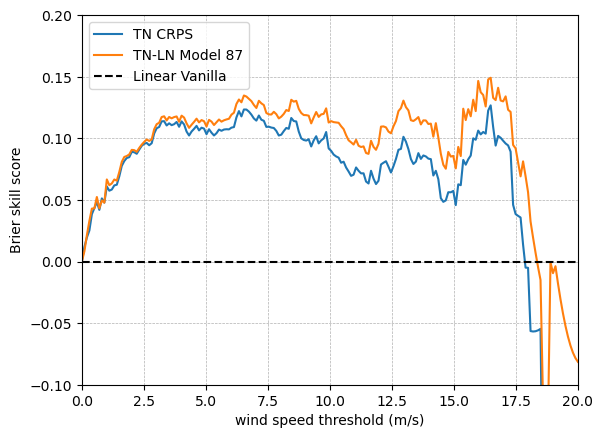

In [32]:
make_brier_skill_plot_tf(emos_base, bagging_same_data_models, test_data0, values=np.linspace(0,20,200), ylim=[-0.1,0.2], name_base_model='Linear Vanilla')

## To Do:

- Make the bagging estimator for the 'extreme' weight functions with CNNs and include this in the results.

- Write the results, conclusion and discussion.

- Incorporate the feedback.

## Models that will be used for results:

- Linear models: Vanilla, intermediate, extreme.

- CNNs (single): Vanilla, TN-LN with weight function extreme from linear models, TN-LN with weight function from model 87, TN with weight function frommodel 87.

- CNNs (bagging): Vanilla, TN-LN with weight function from model 87, TN with weight function frommodel 87. So no models with the 'extreme' weight function.

## Questions:

- Can I include the results from cross-validation for the linear models (possibly in an appendix)?

- My sciencetalk is on October first. Is it possible to also schedule my thesis presentation around this date?

- Next meeting?